# Library

In [1]:
# Untuk pengolahan dataframe
import pandas as pd

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Untuk preprocessing
from sklearn.preprocessing import LabelEncoder


# Data 

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


Data yang kami gunakan yakni dataset yang berasal dari Kaggle, yang bertujuan untuk memprediksi pelanggan mana yang akan memilih beralih, yang mana akan diprediksi dari pelanggan yang sebelumnya sudah di labeli _Churn_, sehingga kasus ini berkaitan dengan _Supervised Learning_ 

# Data Understanding

In [3]:
df.info()

# Melihat tipe data pada setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

# Melihat jumlah kolom dan baris yang dimiliki data

(7043, 21)

## Informasi Fitur 
Terdapat 7043 data observasi dengan 21 fitur dan 1 label (Churn)

|__No.__|__Fitur__|__Deskripsi__|__Tipe Data__|
| - | - | - | - |
|1| **Customer ID** | Menunjukkan nomor ID yang mengidentifikasi setiap pelanggan | Kategorikal, Objek |
|2|	**Gender** | Menunjukkan Jenis kelamin pelanggan (Pria, Wanita) | Kategorikal, Objek |
|3|	**Senior Citizen** | Menunjukkan jika pelanggan berusia 65 tahun atau lebih (Ya = 1, Tidak = 0) | Numerik, Integer |
|4|	**Partner** | Menunkukkan apakah pelanggan memiliki pasangan atau tidak (Ya, Tidak) | Kategorikal, Objek | 
|5|	**Dependents** | Menunjukkan jika pelanggan tinggal dengan tanggungan, bisa tanggungan anak-anak, orang tua, kakek-nenek, dll (Ya, Tidak)| Kategorikal, Objek |
|6|	**Tenure** | Menunjukkan jumlah bulan pelanggan telah tinggal atau berlangganan | Numerik, Integer |
|7|	**Phone Service** | Menunjukkan apakah pelanggan memiliki layanan telepon atau tidak (Ya, Tidak) | Kategorikal, Objek |
|8|	**Multiple Lines** | Menunjukkan jika pelanggan berlangganan beberapa saluran telepon dengan perusahaan (Ya, Tidak) | Kategorikal, Objek |
|9|	**Internet Service** | Menunjukkan jika pelanggan berlangganan layanan Internet dengan perusahaan (Tidak, DSL, Fiber Optic, Kabel) | Kategorikal, Objek |
|10|	**Online Security** | Menunjukkan jika pelanggan berlangganan layanan keamanan online tambahan yang disediakan oleh perusahaan (Ya, Tidak) | Kategorikal, Objek |
|11|	**Online Backup** | Menunjukkan jika pelanggan berlangganan layanan pencadangan online tambahan yang disediakan oleh perusahaan (Ya, Tidak) | Kategorikal, Objek |
|12|	**Device Protection** | Menunjukkan jika pelanggan berlangganan paket perlindungan perangkat tambahan untuk peralatan Internet mereka yang disediakan oleh perusahaan (Ya, Tidak) | Kategorikal, Objek |
|13|	**Tech Support** | Menunjukkan jika pelanggan berlangganan paket dukungan teknis tambahan dari perusahaan dengan waktu tunggu yang lebih singkat (Ya, Tidak) | Kategorikal, Objek |
|14|	**Streaming TV** | Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming program televisi dari penyedia pihak ketiga, perusahaan tidak mengenakan biaya tambahan untuk layanan ini (Ya, Tidak) | Kategorikal, Objek |
|15|	**Streaming Movies** | Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk streaming film dari penyedia pihak ketiga, perusahaan tidak mengenakan biaya tambahan untuk layanan ini (Ya, Tidak) | Kategorikal, Objek |
|16|	**Contract** | Menunjukkan jenis kontrak pelanggan saat ini(Bulan-ke-Bulan, Satu Tahun, Dua Tahun) | Kategorikal, Objek |
|17|	**Paperless Billing** | Menunjukkan jika pelanggan telah memilih penagihan tanpa kertas (Ya, Tidak) | Kategorikal, Objek |
|18|	**Payment Method** | Menunjukkan bagaimana metode pelanggan membayar tagihan mereka (Penarikan Bank, Kartu Kredit, Cek yang Dikirim) | Kategorikal, Objek |
|19|	**Monthly Charges** | Menunjukkan total biaya bulanan pelanggan saat ini untuk semua layanan mereka dari perusahaan | Numerik, Float |
|20|	**Total Charges** | Menunjukkan total biaya pelanggan | Kategorikal, Objek |
|21|	**Churn** | Menunjukkan apakah pelanggan churn atau tidak (Ya atau Tidak) | Kategorikal, Objek |


Informasi Data :
- Fitur Target      :<br> 
   Churn
- Fitur Kategorikal :<br>
   CustomerID, Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup,  DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn
- Fitur Numerikal   :<br> 
   Tenure, MonthlyCharges, TotalCharges    

In [5]:
Num = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Kat = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

In [6]:
df[Num].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df[Kat].describe().T

,count,unique,top,freq
customerID,7043,7043,6040-CGACY,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
for item in df.columns:
    print(item + '=',(df[item].unique()))

# Melihat data unique pada setiap kolom

customerID= ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender= ['Female' 'Male']
SeniorCitizen= [0 1]
Partner= ['Yes' 'No']
Dependents= ['No' 'Yes']
tenure= [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService= ['No' 'Yes']
MultipleLines= ['No phone service' 'No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes' 'No internet service']
OnlineBackup= ['Yes' 'No' 'No internet service']
DeviceProtection= ['No' 'Yes' 'No internet service']
TechSupport= ['No' 'Yes' 'No internet service']
StreamingTV= ['No' 'Yes' 'No internet service']
StreamingMovies= ['No' 'Yes' 'No internet service']
Contract= ['Month-to-month' 'One year' 'Two year']
PaperlessBilling= ['Yes' 'No']
PaymentMethod= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [9]:
df.isnull().sum()

# Melihat apakah ada data yang kosong atau hilang 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
for item in df :
     print (item + '=', (df[item][df[item] == " "]).count())

# Memastikan apakah ada missing value yang tidak terdeteksi

customerID= 0
gender= 0
SeniorCitizen= 0
Partner= 0
Dependents= 0
tenure= 0
PhoneService= 0
MultipleLines= 0
InternetService= 0
OnlineSecurity= 0
OnlineBackup= 0
DeviceProtection= 0
TechSupport= 0
StreamingTV= 0
StreamingMovies= 0
Contract= 0
PaperlessBilling= 0
PaymentMethod= 0
MonthlyCharges= 0
TotalCharges= 11
Churn= 0


Ternyata terdapat Null yang tidak terdeteksi (" ") pada Total Charges sebanyak 11 

In [11]:
print ('Jumlah data duplikat =', df.duplicated().sum())

# Melihat apakah ada data ganda atau duplikat

Jumlah data duplikat = 0


# EDA

In [12]:
# Sebelum EDA, kami ingin melihat berapa kerugian keuangan perusahaan ($) jika pelanggan memilih churn atau beralih

loss = df[['Churn','TotalCharges']][df['Churn'] == 'Yes']

loss['TotalCharges'] = pd.to_numeric(loss['TotalCharges'])
loss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Churn         1869 non-null   object 
 1   TotalCharges  1869 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB


In [13]:
loss['TotalCharges'].sum()

2862926.9

 Berdasarkan angka tersebut, dapat dilihat bahwa jika pelanggan tersebut memilih beralih, maka perusahaan akan mengalami kerugian sebesar $2.862.926,9 juta dollar, sehingga masalah ini perlu di atasi untuk menghindari kerugian tersebut.

### Persentase _Customer Churn_

In [14]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'Pie'},{'type':'Bar'}]])

fig.add_trace(go.Pie(labels = df["Churn"],
                     title  = "Persentase Pelanggan Beralih",
                     textinfo= 'label+percent', 
                     hole=.5,
                     name   = "Churn?"),
                     row=1, col=1)

fig.add_trace(go.Bar(x =df['Churn'].unique(),
                     y =df['Churn'].value_counts(),
                     text= ("No","Yes"),
                     marker_color= ("royalblue","tomato"),
                     name="Churn?"),
                     row=1, col=2)

fig.update_layout(showlegend=False, title_text="<b>Jumlah Pelanggan Beralih<b>")

fig.show()
plotly.offline.plot(fig, filename = 'plot.html')

'plot.html'

  Berdasarkan visualisasi di atas, perusahaan masih memiliki pelanggan loyal yang cukup banyak, namun persentase _churn_ yang mencapai hampir 30% dari total pelanggan yang dimiliki perusahaan merupakan angka yang besar sehingga masalah ini merupakan masalah yang serius, kami akan mengelompokkan fitur ke dalam beberapa kelompok untuk mengetahui alasan pelanggan memilih beralih. 

### Demografi Pelanggan

In [15]:
for item in df:
    df['SeniorCitizen'].replace(to_replace=1, value='Yes', inplace=True)
    df['SeniorCitizen'].replace(to_replace=0, value='No', inplace=True)

fig = make_subplots(rows=1, 
                    cols=4,                                             
                    specs=[[{'type':'Pie'}, {'type':'Pie'},{'type':'Pie'},{'type':'Pie'}]])

fig.add_trace(go.Pie(labels = df["gender"],
                     title  = "Persentase Berdasarkan Kelamin",
                     textinfo= 'label+percent',
                     name   = "Kelamin?"),
              row=1, col=1),

fig.add_trace(go.Pie(labels = df["Partner"], 
                     title  = "Persentase Berdasarkan Pasangan",
                     textinfo= 'label+percent',
                     name   = "Memiliki Pasangan?",
                     marker = {'colors': ["Tomato","royalblue"]}),
             row=1, col=2),

fig.add_trace(go.Pie(labels = df["SeniorCitizen"], 
                     title  = "Persentase Berdasarkan Kelompok Usia ",
                     textinfo= 'label+percent',
                     name   = "> 65 Tahun?"),
             row=1, col=3),

fig.add_trace(go.Pie(labels = df["Dependents"], 
                     title  = "Persentase Berdasarkan Tanggungan",
                     textinfo= 'label+percent',
                     name   = "Mempunyai Tanggungan?"),
              row=1, col=4),

fig.update_layout(title_text="<b>Demografi Pelanggan<b>",
                  showlegend= False,  
                  width=1000, 
                  height=400
                 )

fig.show()
plotly.offline.plot(fig, filename = 'plot.html')

'plot.html'

Berdasarkan visualisasi di atas, mayoritas pelanggan merupakan kelompok usia muda (< 65 tahun), serta mayoritas pelanggan tidak memiliki tanggungan.

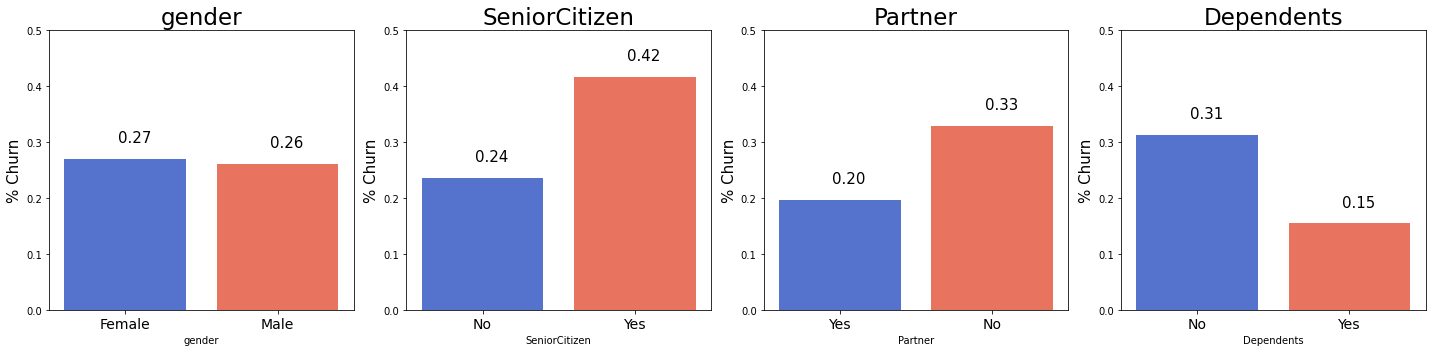

In [16]:
dfc = df.copy()

le = LabelEncoder()
dfc['Churn'] = le.fit_transform(df['Churn'])
dfc['Churn'].value_counts()

demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(20,5))

for i,col in enumerate(demo_features):    
    plt.subplot(1,4,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = dfc, palette = ['RoyalBlue','Tomato'], ci = None)

    plt.xlabel(col, fontsize= 10)
    plt.ylabel("% Churn", fontsize= 15)
    plt.title(col, fontsize= 23)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()
plt.show()

- Gender: Proporsi pelanggan churn berdasarkan kelamin seimbang, hampir tidak terdapat perbedaan
- Senior Citizen : Pelanggan yang yang beralih mayoritas pelanggan dengan kelompok usia tua, kemungkinan akibat penggunaan layanan perusahaan yang lebih tinggi untuk hiburan, bertelepon, dll di banding pelanggan kelompok usia muda, dan kualitas layanan atau produk dapat menjadi alasan beralih  
-  Partner : Pelanggan yang yang beralih mayoritas pelanggan yang tidak memiliki pasangan , kemungkinan karena kebutuhan akan hiburan dan interaksi digital membuat penggunaan internet sangat tinggi, dan kualitas layanan  atau produk menjadi alasan beralih
-  Dependents : ternyata mayoritas pelanggan beralih adalah yang tidak memiliki tanggungan, artinya kemungkinan masalah keuangan pelanggan bukan salah satu alasan utama yang mendasari perilaku churn

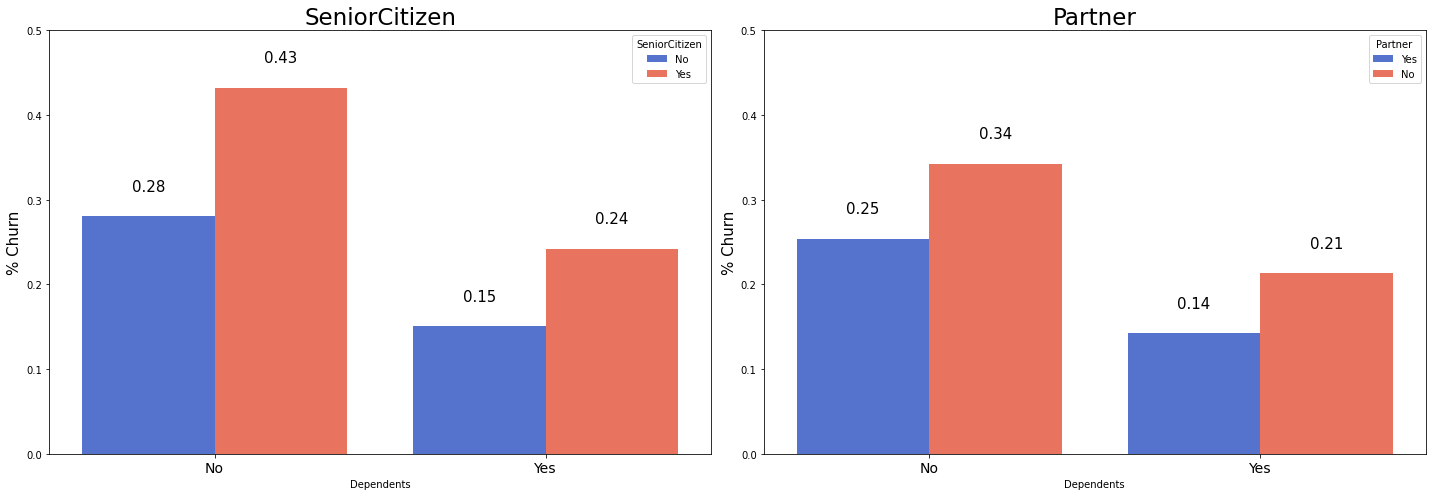

In [17]:
# Kami ingin memperdalam fitur Senior Citizen dan Partner, apakah terdapat hubungan terhadap Dependents,apakah perilaku churn tersebut dapat dipengaruhi karena tanggungan yang memberatkan biaya mereka.

x_features = ['SeniorCitizen', 'Partner']

plt.figure(figsize=(20,7))

for i,col in enumerate(x_features):    
    plt.subplot(1,2,i+1)
    
    ax = sns.barplot(x = "Dependents", y = "Churn", hue = col, data = dfc, palette = ['RoyalBlue','Tomato'], ci = None)

    plt.xlabel("Dependents",fontsize= 10)
    plt.ylabel("% Churn", fontsize= 15)
    plt.ylim(0,0.5)
    plt.title(col, fontsize= 23)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
         ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Berdasarkan visualisasi di atas, Dependents memiliki pengaruh cukup kuat terhadap Senior Citizen, artinya Senior Citizen yang memiliki tanggungan umumnya memilih churn, dan pasangan bukan termasuk ke dalam tanggungan. Namun perlu diperhatikan bahwa pelanggan yang beralih disini mayoritas yang tidak memiliki keduanya (tanggungan dan Pasangan), artinya masalah kualitas pelayanan atau layanan perusahaan bisa menjadi alasan pelanggan beralih

### Masa Berlangganan

In [18]:
fig = (px.box(df, x='Churn',
                      y='tenure'))

fig.update_layout(title='<b> Waktu Berlangganan (Bulan)<b>',
                  showlegend=True,
                  width=1000, height=500),

fig.show()
plotly.offline.plot(fig, filename = 'plot.html')

'plot.html'

Berdasarkan boxplot di atas, mayoritas pelanggan beralih berlangganan rata-rata 10 bulan, artinya dapat diasumsikan mayoritas pelanggan yang beralih adalah pelanggan baru atau dibawah 3-5 tahun. 
<br>

Dapat dilihat pula bahwa, mayoritas pelanggan yang bertahan umumnya berlangganan selama 38 bulan atau > 10 bulan, sehingga dapat diasumsikan bahwa semakin lama pelanggan berada di perusahaan, maka akan semakin rendah tingkat churn-nya.

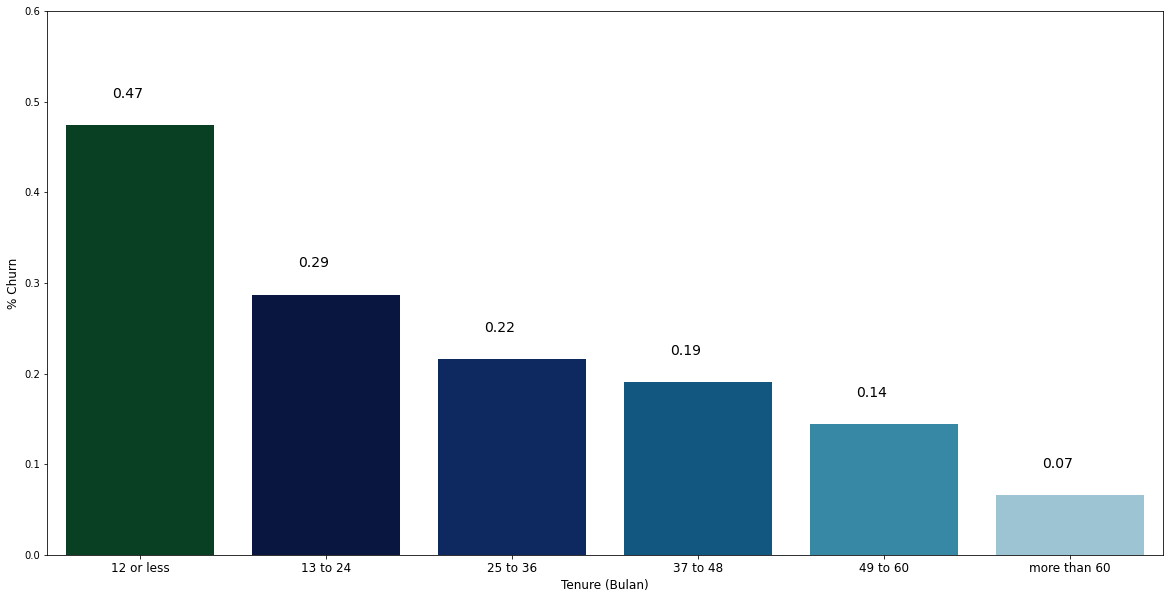

In [19]:
dfc['Tenure_bin'] = pd.cut(dfc['tenure'],[-1,12,24,36,48,60,100])
dfc['Tenure_bin'].value_counts(sort = False)

plt.figure(figsize=(20,10))

ax = sns.barplot(x = "Tenure_bin", y = "Churn", data = dfc, palette = 'ocean', ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure (Bulan)", fontsize= 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

 Berdasarkan visualisasi di atas, menunjukkan bahwa semakin lama waktu pelanggan berlangganan, maka semakin rendah potensi pelanggan tersebut melakukan churn

### Layanan

In [20]:
fig = make_subplots(rows=3, 
                    cols=4,                                             
                    specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'},{'type':'domain'}],
                            [{'type':'domain'}, {'type':'domain'},{'type':'domain'},None], 
                            [{'type':'domain'},None,None,None]])

fig.add_trace(go.Pie(labels = df["PhoneService"],
                     title  = "Phone Service",
                     textinfo= 'label+percent', 
                     name   =  "Berlangganan?"),
              1, 1)

fig.add_trace(go.Pie(labels = df["MultipleLines"], 
                     title  = "Multiple Lines",
                     textinfo= 'label+percent',
                     name   =  "Berlangganan?"),
              1, 2)

fig.add_trace(go.Pie(labels = df["InternetService"], 
                     title  = "Internet Service",
                      textinfo= 'label+percent',
                     name   =  "Berlangganan?"),
              1, 3)

fig.add_trace(go.Pie(labels = df["OnlineSecurity"], 
                     title  = "Online Security",
                     textinfo= 'label+percent',
                     name   =  "Berlangganan?"),
              2, 1)

fig.add_trace(go.Pie(labels = df["OnlineBackup"], 
                     title  = "Online Backup",
                     textinfo= 'label+percent',
                     name   =  "Berlangganan?"),
              2, 2)

fig.add_trace(go.Pie(labels = df["DeviceProtection"], 
                     title  = "Device Protection",
                     textinfo= 'label+percent',
                     name   =  "Berlangganan?"),
              2, 3)

fig.add_trace(go.Pie(labels = df["TechSupport"], 
                     title  = "Tech Support",
                     textinfo= 'label+percent',
                     name   =  "Berlangganan?"),
              3, 1)

fig.update_layout(title_text="<b>Layanan<b>",
                  showlegend= False,  
                  width=1100, 
                  height=800
                 )

fig.show()
plotly.offline.plot(fig, filename = 'plot.html')

'plot.html'

Berdasarkan visualisasi di atas, perbedaan proporsi pada setiap layanan cukup tipis, Proporsi yang paling terlihat perbedaannya yakni Internet Service dan Phone Service, kedua layanan tersebut cukup bisa dianggap sebagai layanan unggulan dalam perusahaan
<br>

Pada Internet Service, dapat dilihat bahwa umumnya pelanggan berlangganan jenis Fiber Optic yang kemungkinan karena Fiber Optic lebih cepat dari DSL, namun Pengguna DSL cukup banyak yang mana umumnya digunakan oleh lembaga atau perusahaan, sehingga pelanggan perusahaan dapat dibagi menjadi pelanggan perseorangan yang umumnya pengguna Fiber Optic dan pelanggan lembaga atau perusahaan yang umumnya menggunakan DSL.
<br>

Dapat dilihat, setiap fitur layanan memiliki hubungan yang cukup kuat terhadap Internet Service, artinya layanan ini menjadi layanan yang mendasari layanan yang lainnya, jika terdapat gangguan atau masalah pada Internet Service, maka akan berdampak pada layanan yang lainnya.

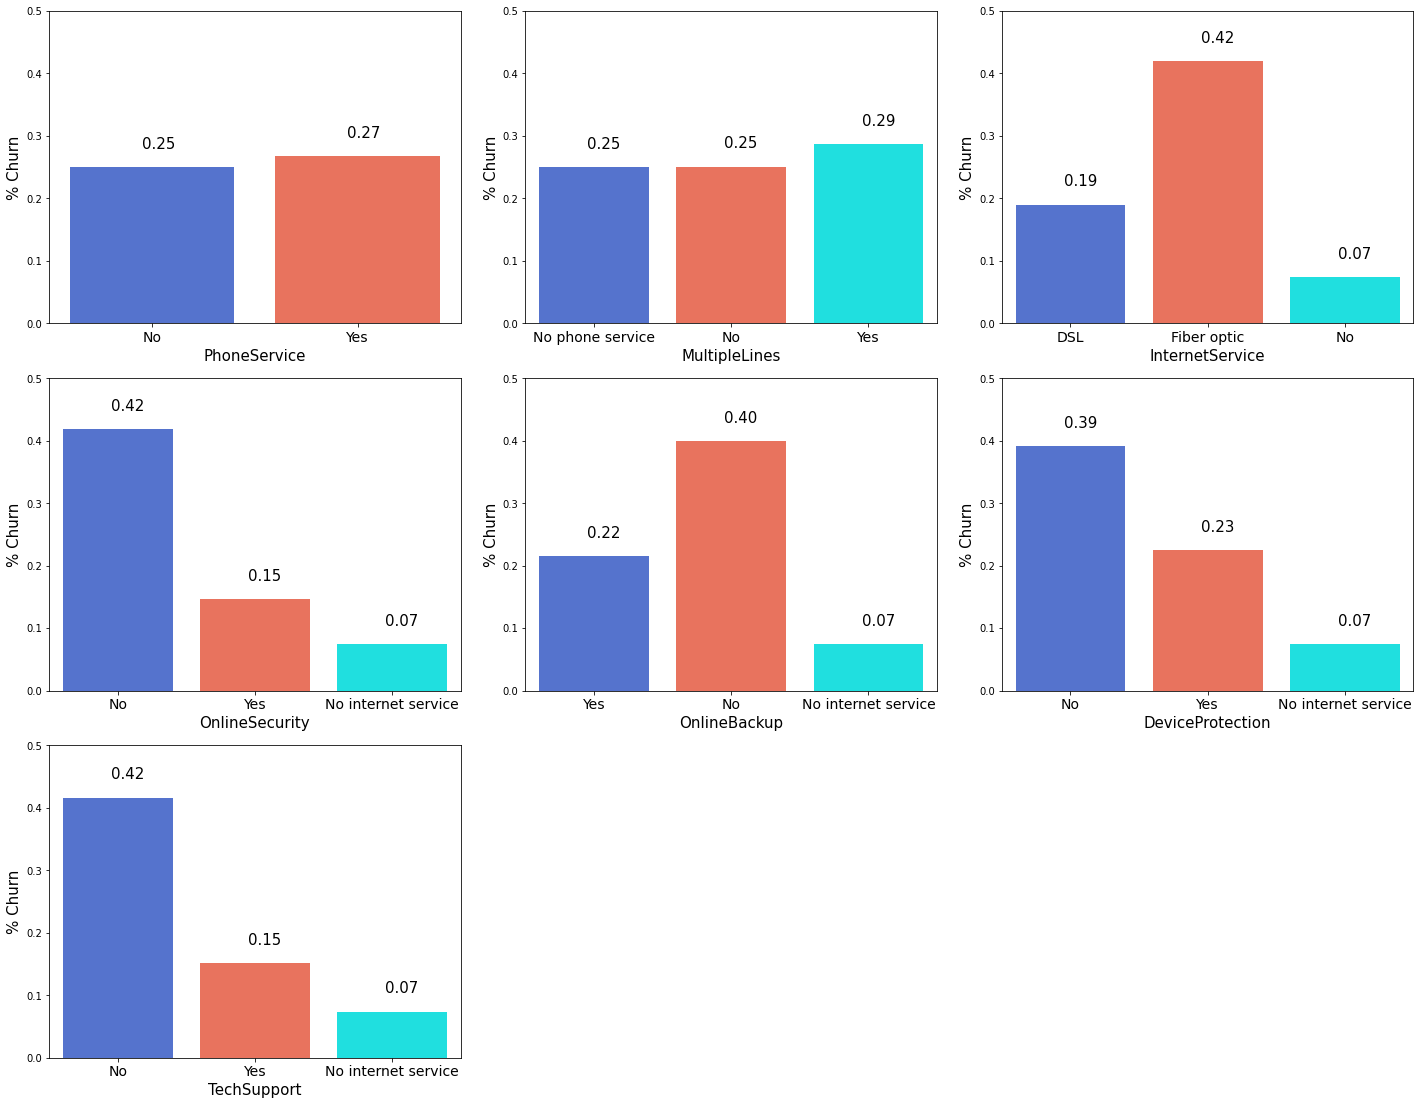

In [21]:
serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

plt.figure(figsize=(20,20))

for i,col in enumerate(serv_features):    
    plt.subplot(4,3,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = dfc, palette = ['royalblue','tomato','cyan'], ci = None)

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("% Churn", fontsize= 15)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Berdasarkan visualisasi di atas, pada fitur Multiple Lines mayoritas pelanggan yang beralih adalah yang menggunakan Multiple Lines, yang umumnya penggunanya adalah Perusahaan atau Lembaga. Kemungkinan karena masalah teknis seperti kualitas jaringan atau biaya yang mahal yang membuat perilaku churn

Dapat dilihat juga, umumnya pelanggan yang beralih merupakan pelanggan hanya berlangganan Internet Service, dan mayoritas yang beralih adalah pelanggan Internet Service yang menggunakan Fiber Optic. Hal ini dapat disebabkan karena kualiatas kecepatan Internet yang tidak baik atau harga yang terlalu mahal pada layanan jenis Fiber Optic tersebut.
<br>

Untuk itu, kita dapat melihat jumlah biaya pada fitur Multiple Lines dan setiap jenis layanan Internet Service untuk melihat besaran biaya yang ditanggung.

In [22]:
pd.DataFrame(df.groupby(by=['MultipleLines'])['MonthlyCharges'].mean().sort_values())

,MonthlyCharges
MultipleLines,
No phone service,42.028592
No,54.195059
Yes,82.036974


In [23]:
pd.DataFrame(df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values())

,MonthlyCharges
InternetService,
No,21.079194
DSL,58.102169
Fiber optic,91.500129


Berdasarkan tabel di atas, dapat dibuktikan bahwa layanan Internet jenis Fiber Optic adalah jenis yang paling mahal dibandingkan jenis DSL, serta terdapat perbedaan biaya yang cukup signifikan antara pelanggan yang tidak berlangganan Multiple Lines dengan yang berlangganan. Sehingga terdapat indikasi bahwa pelanggan beralih karena kualitas Internet atau biaya yang terlalu mahal 

In [24]:
fig = make_subplots(rows=1, 
                    cols=2,                                             
                    specs=[[{'type':'domain'},{'type':'domain'}]]
                    )

fig.add_trace(go.Pie(labels = df["StreamingTV"],
                     title  = "Streaming TV ",
                     textinfo= 'label+percent', 
                     name   =  "Menggunakan?"),
              1, 1)

fig.add_trace(go.Pie(labels = df["StreamingMovies"], 
                     title  = "Streaming Movies",
                     textinfo= 'label+percent',
                     name   =  "Menggunakan?"),
              1, 2)

fig.update_layout(title_text="<b>Layanan Pihak - 3<b>",
                  showlegend= False,  
                  width=900, 
                  height=400
                 )

fig.show()
plotly.offline.plot(fig, filename = 'plot.html')

'plot.html'

Berdasarkan visualisasi di atas, proporsi Streaming TV dan Streaming Movies perbedaannya sangat tipis, sehingga dapat diasumsikan bahwa pelanggan yang menggunakan Internet untuk Streaming TV juga menggunakan Internet untuk Streaming Movies, begitupun sebaliknya

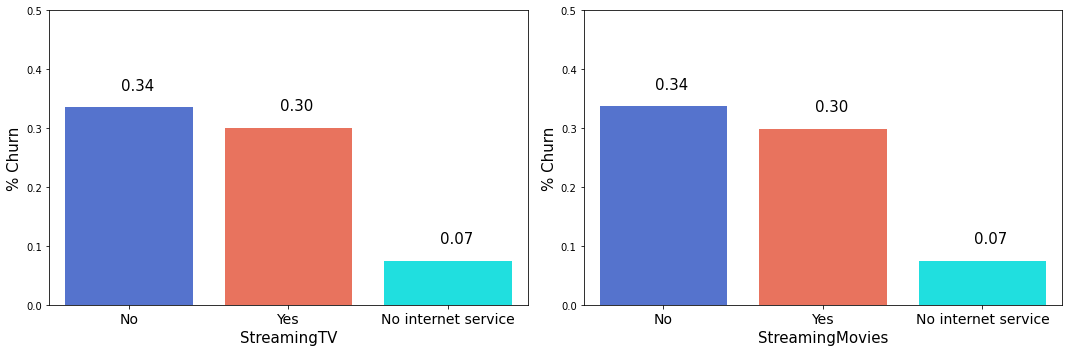

In [25]:
serv_features2 = ['StreamingTV','StreamingMovies']

plt.figure(figsize=(15,5))

for i,col in enumerate(serv_features2):    
    plt.subplot(1,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = dfc, palette = ['royalblue','tomato','cyan'], ci = None)

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("% Churn", fontsize= 15)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Berdasarkan visualisasi di atas, perbedaan proporsi churn sangat tipis, mayoritas pelanggan yang beralih adalah pelanggan yang tidak menggunakan internet untuk Streaming Movies ataupun Streaming TV. Namun pelanggan yang menggunakan Internet untuk Streaming TV dan Streaming Movies cukup tinggi juga, tetapi karena fitur ini merupakan layanan eksternal atau layanan di luar perusahaan, maka hal yang mendasari perilaku churn pada kedua fitur ini adalah masalah pada fitur Internet Service yang mendasari fitur ini. 

<br>
Kita dapat memperdalam pada pelanggan yang menggunakan kedua fitur ini, dengan melihat pelanggan berdasarkan kelompok usia dan biaya bulanannya untuk dapat mengetahui alasan pelanggan beralih 

In [26]:
print(df.groupby(by=['SeniorCitizen'])['StreamingTV'].value_counts())
print(df.groupby(by=['SeniorCitizen'])['StreamingMovies'].value_counts())

SeniorCitizen  StreamingTV        
No             No                     2292
               Yes                    2135
               No internet service    1474
Yes            Yes                     572
               No                      518
               No internet service      52
Name: StreamingTV, dtype: int64
SeniorCitizen  StreamingMovies    
No             No                     2290
               Yes                    2137
               No internet service    1474
Yes            Yes                     595
               No                      495
               No internet service      52
Name: StreamingMovies, dtype: int64


In [27]:
print(df.groupby(by=['StreamingTV'])['MonthlyCharges'].value_counts())
print(df.groupby(by=['StreamingMovies'])['MonthlyCharges'].value_counts())

StreamingTV  MonthlyCharges
No           74.40             13
             69.95             12
             74.90             12
             50.15             11
             70.15             11
                               ..
Yes          117.80             1
             118.20             1
             118.35             1
             118.65             1
             118.75             1
Name: MonthlyCharges, Length: 2235, dtype: int64
StreamingMovies  MonthlyCharges
No               74.40             14
                 70.15             12
                 74.90             12
                 50.15             11
                 69.95             11
                                   ..
Yes              117.80             1
                 118.20             1
                 118.35             1
                 118.65             1
                 118.75             1
Name: MonthlyCharges, Length: 2244, dtype: int64


Hasilnya, mayoritas pelanggan yang menggunakan internet untuk Streaming Movies dan Streaming TV adalah pelanggan dengan kelompok usia muda (< 65 tahun), sehingga dapat diasumsikan bahwa mayoritas pelanggan yang beralih pada kedua fitur ini adalah pelanggan dengan usia muda (< 65 tahun), kemungkinan churn alasannya adalah membesarnya biaya bulanan karena pengunaan kedua fitur ini.

In [28]:
fig = make_subplots(rows=2, 
                    cols=2,                                             
                    specs=[[{'type':'Pie'},{'type':'Pie'}],[{'type':'Pie'},None]]
                    )

fig.add_trace(go.Pie(labels = df["Contract"],
                     title  = "Contract",
                     textinfo= 'label+percent', 
                     name   =  "Menggunakan?"),
              1, 1)

fig.add_trace(go.Pie(labels = df["PaperlessBilling"], 
                     title  = "PaperlessBilling",
                     textinfo= 'label+percent',
                     name   =  "Menggunakan?"),
              1, 2)

fig.add_trace(go.Pie(labels = df["PaymentMethod"], 
                     title  = "PaymentMethod",
                     textinfo= 'label+percent',
                     name   =  "Menggunakan?"),
              2, 1)

fig.update_layout(title_text="<b>Jenis Pembayaran<b>",
                  showlegend= False,  
                  width=1000, 
                  height=800
                 )

fig.show()
plotly.offline.plot(fig, filename = 'plot.html')

'plot.html'

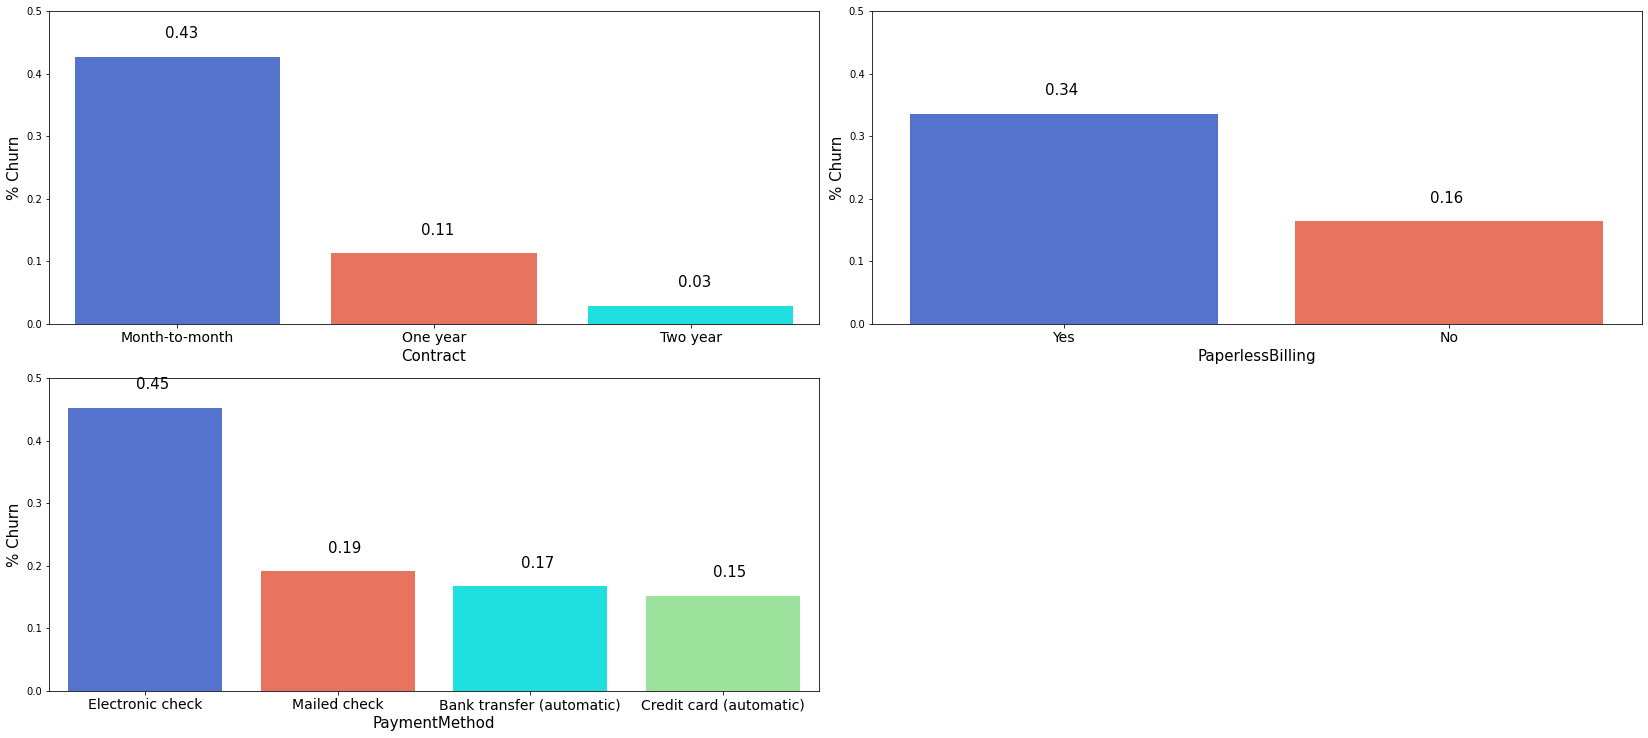

In [29]:
Bill_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(23,20))

for i,col in enumerate(Bill_features):    
    plt.subplot(4,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = dfc, palette = ['royalblue','tomato','cyan','lightgreen'], ci = None)

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("% Churn", fontsize= 15)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

Berdasarkan visualisasi di atas, pelanggan yang beralih mayoritas pelanggan dengan sistem pembayarannya tiap bulan yang mana sistem perbulan ini adalah sistem yang paling banyak digunakan, kemungkinan karena total nominal yang dikeluarkan lebih besar dari sistem pembayaran 1 atau 2 tahun.
<br>

Dapat dilihat pula pelanggan yang beralih mayoritas pelanggan yang menggunakan sistem paperless billing yang mana fitur ini juga paling banyak digunakan, kemungkinan karena terdapat biaya admin yang memberatkan atau kualitas sistemnnya yang kurang baik.
<br>

Juga, mayoritas pelanggan yang beralih adalah pelanggan yang menggunakan metode pembayaran elektronik (ATM, e-money, dll), kemungkinan karena metode ini tidak lebih efisien dibandingkan dengan metode pembayaran yang lain yang sudah automatis.
<br>

Untuk itu, kita dapat memperdalam dengan melihat perbedaan Rata-rata nominal yang pelanggan bayar.

In [30]:
print(df.groupby(by=['Contract'])['MonthlyCharges'].mean().T)
print(df.groupby(by=['PaperlessBilling'])['MonthlyCharges'].mean().T)
print(df.groupby(by=['PaymentMethod'])['MonthlyCharges'].mean().T)

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64
PaperlessBilling
No     51.992967
Yes    73.553776
Name: MonthlyCharges, dtype: float64
PaymentMethod
Bank transfer (automatic)    67.192649
Credit card (automatic)      66.512385
Electronic check             76.255814
Mailed check                 43.917060
Name: MonthlyCharges, dtype: float64


Dapat di lihat bahwa terdapat perbedaan yang signifikan pada rata-rata nominal yang pelanggan bayar, terutama pada fitur Payment Method dan Paperless Biling, sehingga dapat diasumsikan pelanggan beralih karena biaya administrasi yang memberatkan.

In [31]:
df3 = df[['TotalCharges','Churn','MonthlyCharges']]
df3['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

pd.DataFrame(df.groupby(by=['Churn'])['MonthlyCharges'].mean().reset_index())

<ipython-input-31-8bcbb8fd04ce>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Churn,MonthlyCharges
0,No,61.265124
1,Yes,74.441332


In [32]:
pd.DataFrame(df3.groupby(by=['Churn'])['TotalCharges'].mean().reset_index())

,Churn,TotalCharges
0,No,2555.344141
1,Yes,1531.796094


Dapat dilihat, bahwa umumnya pelanggan yang beralih, pengeluaran perbulannya lebih besar dari pelanggan yang bertahan, kemungkinan faktor biaya yang membengkak yang mengakibatkan churn

## Conclusion :

Umumnya pelanggan yang beralih adalah :
      <br>
      
       - Berusia > 65 tahun
       - Tidak punya pasangan atau belum menikah
       - Umumnya tidak punya tanggungan, terkecuali yang berusia > 65 tahun mayoritas karena memiliki tanggungan
       - Rata-rata baru berlangganan selama 12 bulan ke bawah atau di bawah 3 tahun
       - Pengguna Internet Service jenis Fiber Optic
       - Metode pembayaran menggunakan Electronic Check, Paperless Billing, dan jangka pembayarannya perbulan.
       - Monthly Charges yang tinggi

## Business Insight :
- **Perusahaan harus memperhatikan :**
     - Senior Citizen (> 65 tahun), karena tingkat churn tertinggi
     - memperbaiki kualitas internet karena ada indikasi kualitas yang kurang baik
     - Memperhatikan daya beli pelanggan, sehingga pelanggan tidak beralih karena alasan tagihan

<br>

- **Perusahaan sebaiknya melakukan :**
     - Perusahaan dapat memilih segmentasi pelanggan, sebaiknya fokus pada pelanggan muda karena mayoritas pelanggan perusahaan adalah kelompok usia muda.
     - Dapat memberlakukan promosi diskon potongan harga, untuk mempertahankan pelanggan yang berlangganan jangka pendek sehingga menghindari pelanggan beralih kepada kompetitor yang memberikan benefit lebih menguntungkan, serta memberikan diskon spesial pada pelanggan usia tua untuk menghindari churn karena masalah biaya. 
     - Kualitas Internet Service harus ditingkatkan karena fitur ini adalah fitur dasar bagi seluruh produk yang dimiliki perusahaan, dan karena ada indikasi kuat pelanggan churn umumnya karena fitur ini.  
     - Memberikan benefit khusus kepada pelanggan loyal untuk menyebarkan strategi wom, karena perusahaan memiliki cukup banyak pelanggan loyal, dan strategi ini akan dapat menghemat banyak biaya operasional. 
     - Perusahaan dapat fokus pada produk Internet Service dan Phone Service, karena kedua produk tersebut merupakan produk unggulan.
     - Kualitas sistem pembayaran harus ditingkatkan, harus mengutamakan proses automasi untuk memotong alur proses pembayaran yang tidak efisien dan tidak efektif.

# Data Preprocessing

In [33]:
telco = df.copy()

In [34]:
# TotalCharges masih berbentuk object, yang mana datanya berisi data uang, sehingga harus di ubah ke tipe float

telco['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
# Mari kita lihat detail null value tersebut

telco[telco.TotalCharges.isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Berdasarkan Tenure dan TotalCharges yang kosong, data ini kemungkinan adalah pelanggan baru yang masih dalam percobaan sehingga datanya tidak lengkap, jadi sebaiknya kita hapus

In [37]:
telco.dropna(axis=0,how="any",inplace=True)
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
# Merubah dan merapihkan nama fitur 


telco = telco.rename(columns={'customerID': 'CustomerID','tenure': 'TenureMonths', 'gender': 'Gender'})

In [39]:
# Memberi label pada fitur target, 1 untuk Churn dan 0 untuk Not Churn
for item in telco:
    telco['Churn'].replace(to_replace='Yes', value=1, inplace=True)
    telco['Churn'].replace(to_replace='No', value=0, inplace=True)

In [40]:
telco

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [41]:
telco.to_csv('telco.csv',index=False)